## 1.Réaliser l'analyse exploratoire des données

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, roc_curve
from sklearn import metrics
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
df.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

### 2. Visualiser les données


In [6]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

diagnosis----------- ['M' 'B']


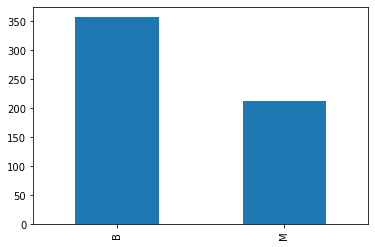

In [7]:

for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.bar()

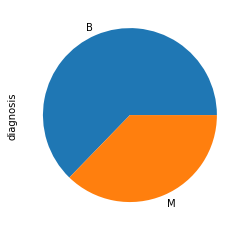

In [8]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

<ipython-input-9-cd34277f598c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

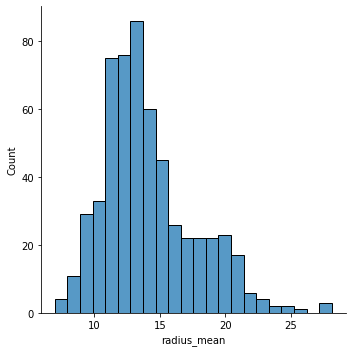

<Figure size 432x288 with 0 Axes>

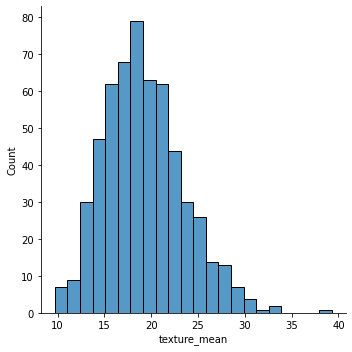

<Figure size 432x288 with 0 Axes>

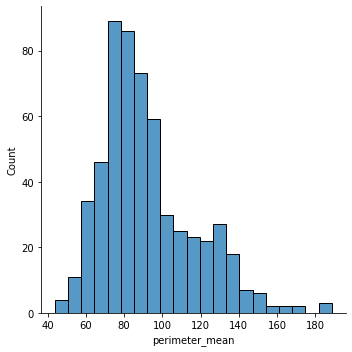

<Figure size 432x288 with 0 Axes>

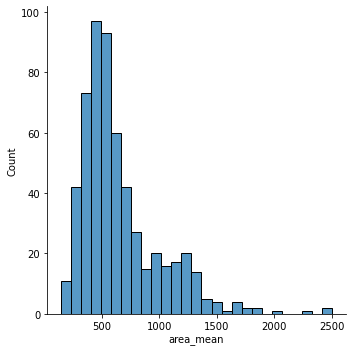

<Figure size 432x288 with 0 Axes>

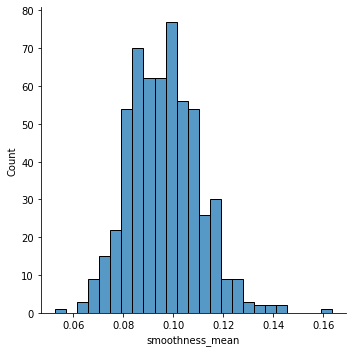

<Figure size 432x288 with 0 Axes>

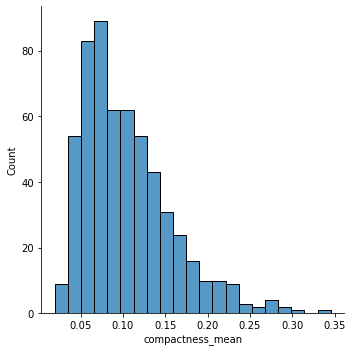

<Figure size 432x288 with 0 Axes>

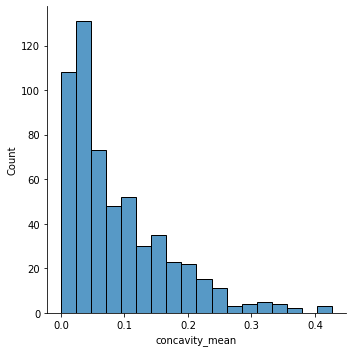

<Figure size 432x288 with 0 Axes>

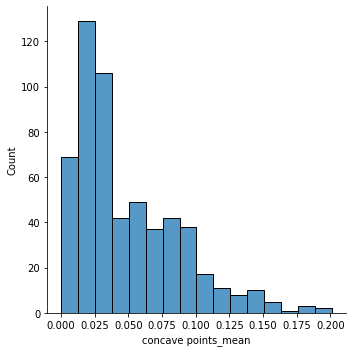

<Figure size 432x288 with 0 Axes>

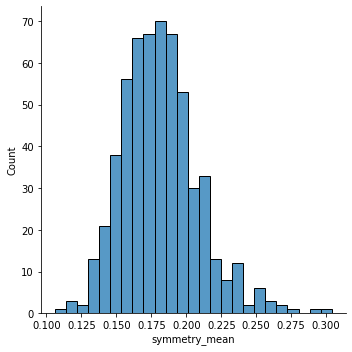

<Figure size 432x288 with 0 Axes>

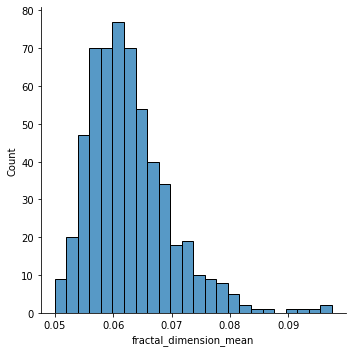

<Figure size 432x288 with 0 Axes>

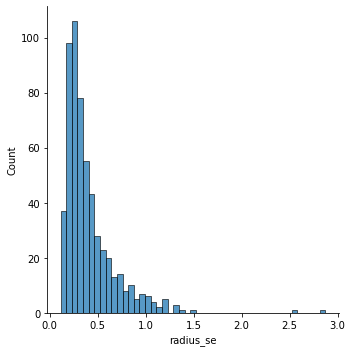

<Figure size 432x288 with 0 Axes>

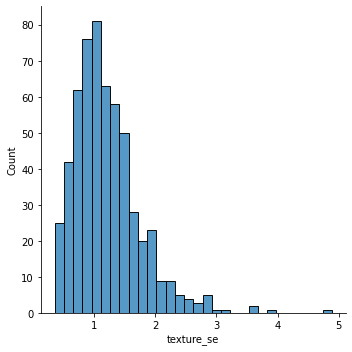

<Figure size 432x288 with 0 Axes>

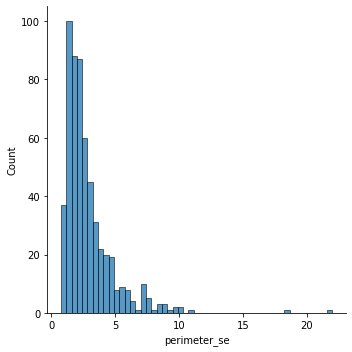

<Figure size 432x288 with 0 Axes>

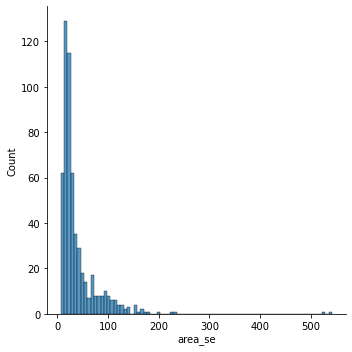

<Figure size 432x288 with 0 Axes>

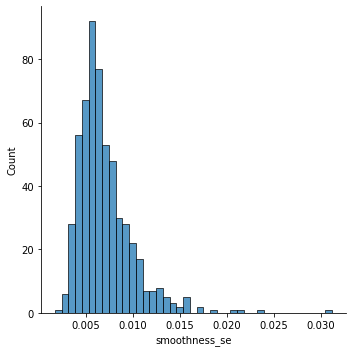

<Figure size 432x288 with 0 Axes>

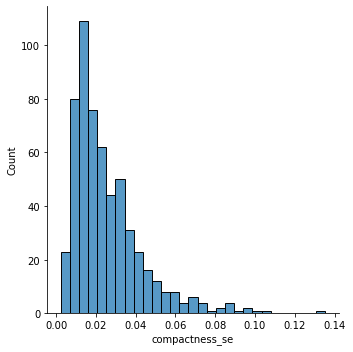

<Figure size 432x288 with 0 Axes>

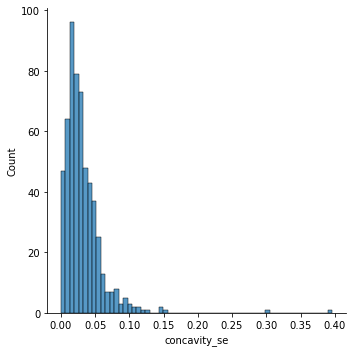

<Figure size 432x288 with 0 Axes>

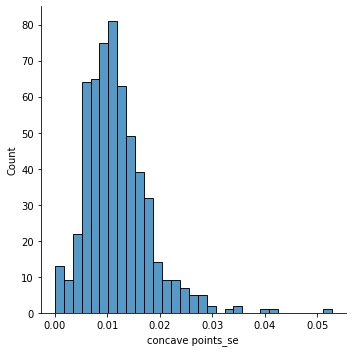

<Figure size 432x288 with 0 Axes>

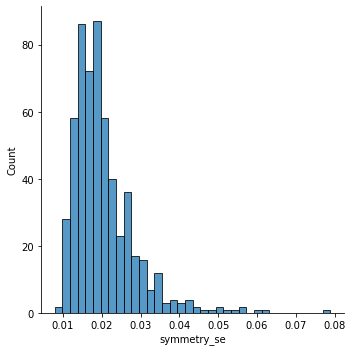

<Figure size 432x288 with 0 Axes>

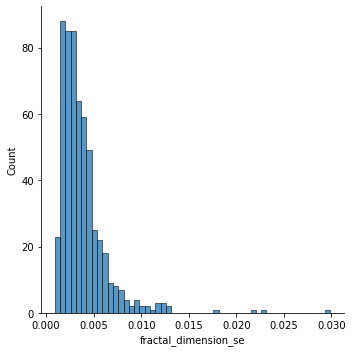

<Figure size 432x288 with 0 Axes>

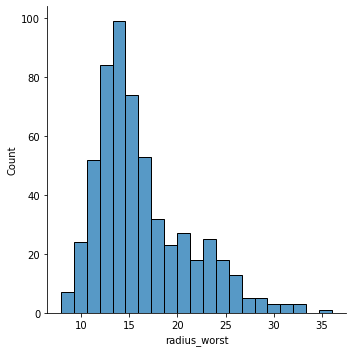

<Figure size 432x288 with 0 Axes>

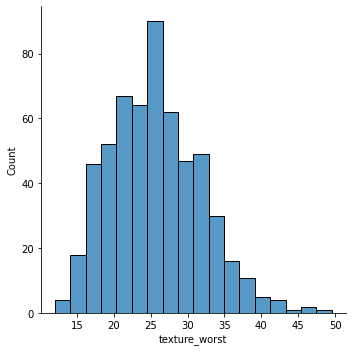

<Figure size 432x288 with 0 Axes>

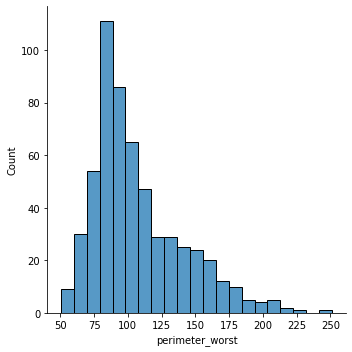

<Figure size 432x288 with 0 Axes>

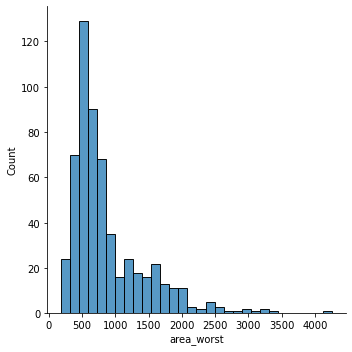

<Figure size 432x288 with 0 Axes>

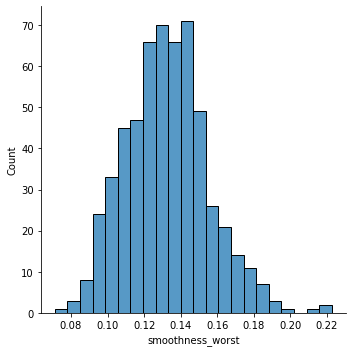

<Figure size 432x288 with 0 Axes>

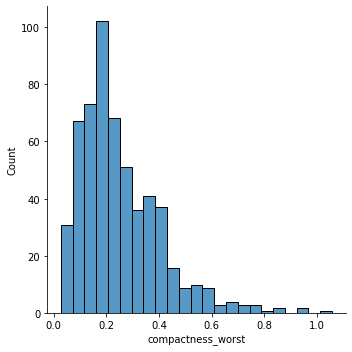

<Figure size 432x288 with 0 Axes>

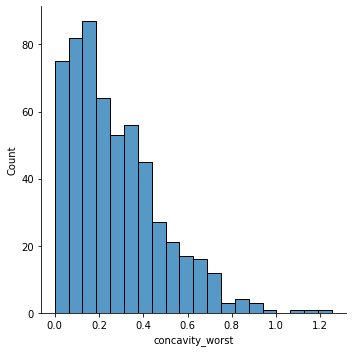

<Figure size 432x288 with 0 Axes>

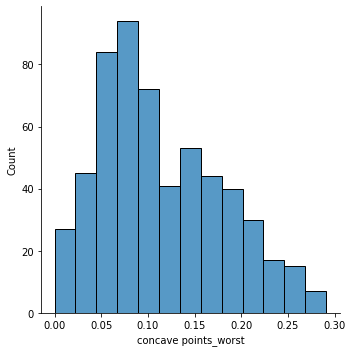

<Figure size 432x288 with 0 Axes>

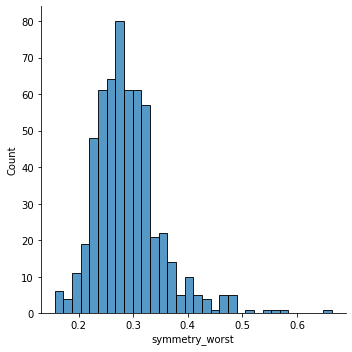

<Figure size 432x288 with 0 Axes>

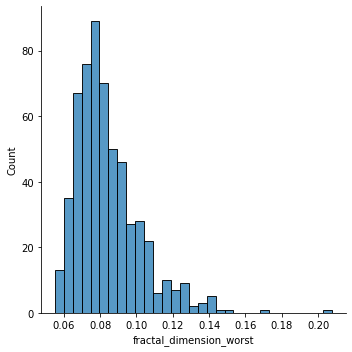

<Figure size 432x288 with 0 Axes>

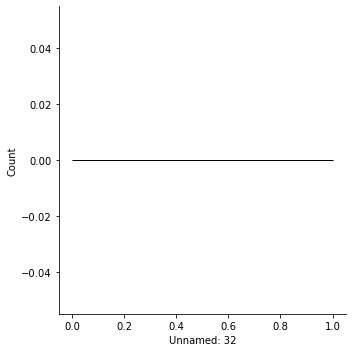

In [9]:
#### Histrograme des valeurs continues
for col in df.select_dtypes('float64'):
    plt.figure()
    #sns.displot(df, x=col, kind="kde")
    sns.displot(df[col])

In [10]:
df_corr = df.iloc[:, 1:32]
df_corr
matrice_corr = df_corr.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.0,0.341,0.998,1.0,0.149,0.498,0.646,0.76,0.12,-0.35,0.55,-0.144,0.566,0.738,-0.326,0.265,0.365,0.411,-0.241,-0.00841,0.979,0.315,0.972,0.979,0.126,0.491,0.596,0.727,0.175,0.0446
texture_mean,0.341,1.0,0.348,0.344,0.0246,0.266,0.343,0.307,0.11,-0.0593,0.364,0.451,0.387,0.395,0.037,0.264,0.287,0.239,0.00895,0.148,0.367,0.909,0.375,0.368,0.101,0.291,0.34,0.319,0.121,0.116
perimeter_mean,0.998,0.348,1.0,0.997,0.183,0.544,0.682,0.789,0.15,-0.305,0.56,-0.138,0.583,0.746,-0.311,0.309,0.402,0.442,-0.228,0.0324,0.981,0.323,0.979,0.981,0.157,0.535,0.632,0.758,0.199,0.089
area_mean,1.0,0.344,0.997,1.0,0.138,0.489,0.643,0.755,0.114,-0.358,0.553,-0.142,0.568,0.742,-0.327,0.26,0.362,0.406,-0.244,-0.0127,0.979,0.318,0.972,0.98,0.12,0.486,0.594,0.723,0.171,0.0388
smoothness_mean,0.149,0.0246,0.183,0.138,1.0,0.679,0.519,0.565,0.542,0.588,0.334,0.0913,0.331,0.296,0.339,0.392,0.355,0.439,0.151,0.413,0.203,0.0606,0.226,0.192,0.796,0.481,0.429,0.499,0.394,0.511
compactness_mean,0.498,0.266,0.544,0.489,0.679,1.0,0.897,0.848,0.552,0.499,0.507,0.0478,0.584,0.54,0.127,0.818,0.772,0.732,0.0984,0.621,0.543,0.255,0.592,0.532,0.579,0.901,0.838,0.825,0.45,0.689
concavity_mean,0.646,0.343,0.682,0.643,0.519,0.897,1.0,0.927,0.447,0.258,0.575,0.0513,0.646,0.644,0.0703,0.761,0.858,0.775,0.0228,0.514,0.682,0.336,0.722,0.677,0.489,0.85,0.939,0.905,0.384,0.542
concave points_mean,0.76,0.307,0.789,0.755,0.565,0.848,0.927,1.0,0.424,0.143,0.635,0.00871,0.68,0.727,0.0168,0.608,0.675,0.758,-0.0284,0.378,0.787,0.301,0.814,0.78,0.49,0.758,0.827,0.937,0.355,0.421
symmetry_mean,0.12,0.11,0.15,0.114,0.542,0.552,0.447,0.424,1.0,0.428,0.338,0.139,0.355,0.288,0.206,0.436,0.368,0.383,0.384,0.403,0.165,0.119,0.191,0.154,0.424,0.441,0.394,0.397,0.71,0.41
fractal_dimension_mean,-0.35,-0.0593,-0.305,-0.358,0.588,0.499,0.258,0.143,0.428,1.0,0.00148,0.157,0.0553,-0.12,0.402,0.481,0.344,0.286,0.314,0.684,-0.295,-0.0478,-0.247,-0.305,0.493,0.404,0.243,0.139,0.295,0.761


### 3. Déclarer le vecteur de caractéristiques et la variable cible


In [11]:
X = df.iloc[:, 2:32]
y = df.iloc[:,1]

# #creating labelEncoder
# le = LabelEncoder()
# # Converting string labels into numbers.
# diagnosis_encoded = le.fit_transform(y)
# diagnosis_encoded[18:20]
y = y.replace(['M','B'], [0, 1])

Dans ce cas le labelEoncoder met B=1, M=0

### 4. Divisez les données en un ensemble d'entraînement et de test séparé

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

### 5. Feature engineering (Ingénierie des fonctionnalités)

### 6.Feature scaling

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 7. Ajuster le classificateur à l'ensemble d'entraînement

In [14]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 8.Prédire les résultats du test 

In [15]:
y_pred = classifier.predict(X_test)
y_pred_prob_1 = classifier.predict_proba(X_test)[0:100, 1]

### 9. Vérifiez le score de précision

In [16]:
score = classifier.score(X_test, y_test)
print('score :', score.round(3))
print('precision_score :', precision_score(y_test, y_pred,average='macro').round(3))

score : 0.956
precision_score : 0.965


In [17]:
# examine the class distribution of y_true 
print('Examine the y_true:'"\n", y.value_counts())
# examine the class distribution of the testing set (using a Pandas Series method)
print("Examine the class distribution:","\n",y_test.value_counts())

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("calculate the percentage of ones:",y_test.mean(),"\n")

# calculate the percentage of zeros
print("calculate the percentage of zeros:",1 - y_test.mean(),"\n")

# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
print("calculate null accuracy:",max(y_test.mean(), 1 - y_test.mean()),"\n")

# calculate null accuracy (for multi-class classification problems)
print("calculate null accuracy :",y_test.value_counts().head(1) / len(y_test),"\n")

# print the first 70 true and predicted responses
print("Print the first 10 true and predicted responses:")

df1 =pd.DataFrame({'y_True': y_test.values[0:100], 'y_pred_proba': y_pred_prob_1[0:100]})
df1

Examine the y_true:
 1    357
0    212
Name: diagnosis, dtype: int64
Examine the class distribution: 
 1    67
0    47
Name: diagnosis, dtype: int64
calculate the percentage of ones: 0.5877192982456141 

calculate the percentage of zeros: 0.4122807017543859 

calculate null accuracy: 0.5877192982456141 

calculate null accuracy : 1    0.587719
Name: diagnosis, dtype: float64 

Print the first 10 true and predicted responses:


,y_True,y_pred_proba
0,0,0.0
1,1,0.8
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
95,1,1.0
96,0,0.0
97,1,1.0
98,1,1.0


### 10 .Reconstruire le modèle de classification kNN en utilisant différentes valeurs de 

In [18]:
def k_number(k):
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

### 11. Métriques de classification. 

In [19]:
print(classification_report(y_test, k_number(2)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.95      0.93      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [20]:
print(classification_report(y_test, k_number(5)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [21]:
print(classification_report(y_test, k_number(6)))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        47
           1       0.93      0.99      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [22]:
print(classification_report(y_test, k_number(10)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        47
           1       0.94      0.99      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 12.Matrice de confusion. 

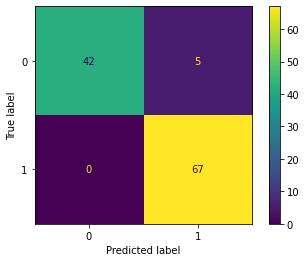

In [23]:
# confusion matrix
plot_confusion_matrix(classifier,X_test, y_test)  
plt.show()

### 13.ROC - AUC.

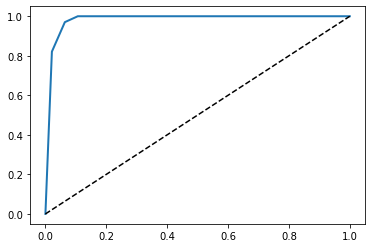

In [24]:
# plot Roc with k = 5
y_pred_1 = classifier.predict_proba(X_test)[:, 1]

y_pred_prob = classifier.predict_proba(X_test)[:, 1]
 
y_pred_prob_1 = classifier.predict_proba(X_test)[0:10, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )                               

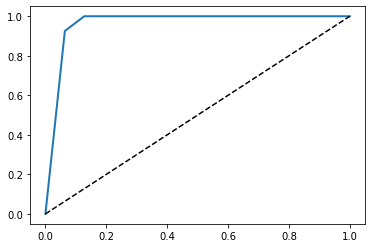

In [25]:
def k_number2(k):
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict_proba(X_test)[:, 1]
    return y_pred

fpr, tpr, thresholds = roc_curve(y_test, k_number2(2))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

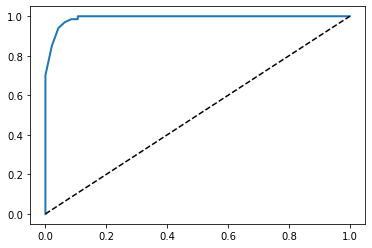

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, k_number2(10))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

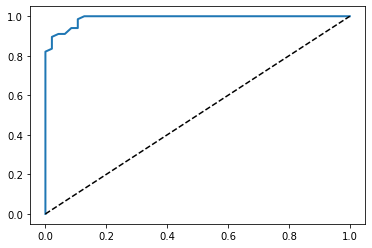

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, k_number2(50))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

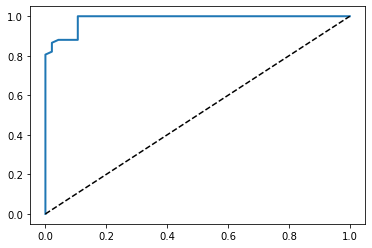

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, k_number2(100))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

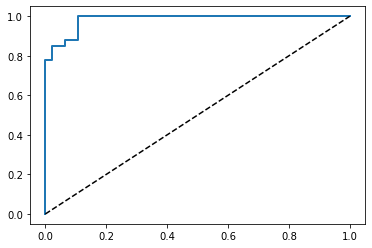

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, k_number2(200))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

### 14.Utiliser la validation croisée K-Fold 

In [45]:
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)
KFold(n_splits=2, random_state=None
      , shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index[0:2], "TEST:", test_index[0:2])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [285 286] TEST: [0 1]


KeyError: "None of [Int64Index([285, 286, 287, 288, 289, 290, 291, 292, 293, 294,\n            ...\n            559, 560, 561, 562, 563, 564, 565, 566, 567, 568],\n           dtype='int64', length=284)] are in the [columns]"

('val_score_mean = 0.9577533577533577', 'val_score_std = 0.004998654332224334')

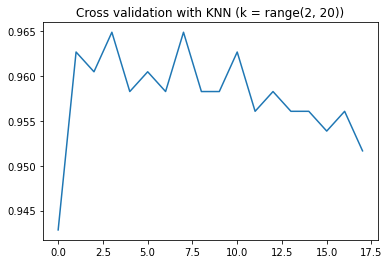

In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np
def cross_val(K):
    val_score = []
    for k in K:
        score_val = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
        val_score.append(score_val)
    val_mean = (np.array(val_score)).mean()
    val_std = (np.array(val_score)).std()
    #print(val_mean)
    plt.plot(val_score)
    plt.title('Cross validation with KNN (k = {})'.format(K))
    return 'val_score_mean = {}'.format(val_mean),  'val_score_std = {}'.format(val_std)
K = range(2, 20)
cross_val(K)

### Utiliser les donnée sans StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

X_ = df.iloc[:, 2:32]
y_ = df.iloc[:,1]



y_ = y_.replace(['M','B'], [0, 1])

scaler = StandardScaler()
scaler.fit_transform(X_, y_)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y_, test_size=0.20,random_state=0)

In [46]:

classifier_ = KNeighborsClassifier(n_neighbors=5)
classifier_.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred_ = classifier.predict(X_test1)
y_pred_prob_2 = classifier_.predict_proba(X_test1)[0:100, 1]

In [48]:
# examine the class distribution of y_true 
print('Examine the y_true:'"\n", y_.value_counts())
# examine the class distribution of the testing set (using a Pandas Series method)
print("Examine the class distribution:","\n",y_test1.value_counts())

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("calculate the percentage of ones:",y_test1.mean(),"\n")

# calculate the percentage of zeros
print("calculate the percentage of zeros:",1 - y_test1.mean(),"\n")

# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
print("calculate null accuracy:",max(y_test1.mean(), 1 - y_test1.mean()),"\n")

# calculate null accuracy (for multi-class classification problems)
print("calculate null accuracy :",y_test1.value_counts().head(1) / len(y_test1),"\n")

# print the first 70 true and predicted responses
print("Print the first 10 true and predicted responses:")

df2=pd.DataFrame({'y_True': y_test1.values[0:100], 'y_pred_proba': y_pred_prob_2[0:100]})
df2

Examine the y_true:
 1    357
0    212
Name: diagnosis, dtype: int64
Examine the class distribution: 
 1    67
0    47
Name: diagnosis, dtype: int64
calculate the percentage of ones: 0.5877192982456141 

calculate the percentage of zeros: 0.4122807017543859 

calculate null accuracy: 0.5877192982456141 

calculate null accuracy : 1    0.587719
Name: diagnosis, dtype: float64 

Print the first 10 true and predicted responses:


,y_True,y_pred_proba
0,0,0.4
1,1,1.0
2,1,1.0
3,1,0.4
4,1,1.0
...,...,...
95,1,1.0
96,0,0.0
97,1,1.0
98,1,1.0


In [49]:
def k_number(k):
    classifier_ = KNeighborsClassifier(n_neighbors= k)
    classifier_.fit(X_train1, y_train1)
    y_pred_ = classifier_.predict(X_test1)
    return y_pred_

In [50]:
print(classification_report(y_test1, k_number(2)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        47
           1       0.95      0.87      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



In [51]:
print(classification_report(y_test1, k_number(5)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.95      0.94      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [52]:
print(classification_report(y_test1, k_number(10)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.96      0.96      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



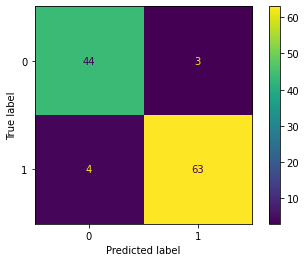

In [53]:
# confusion matrix
plot_confusion_matrix(classifier_,X_test1, y_test1)  
plt.show()

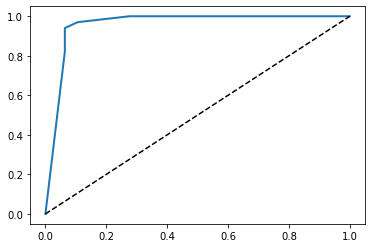

In [54]:
# plot Roc with k = 5
y_pred_2= classifier_.predict_proba(X_test1)[:, 1]

y_pred_prob_ = classifier_.predict_proba(X_test1)[:, 1]
 
y_pred_prob_2 = classifier_.predict_proba(X_test1)[0:10, 1]

fpr1, tpr1, thresholds1= roc_curve(y_test1,y_pred_2)
plt.plot(fpr1, tpr1, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

In [55]:
def k_number3(k):
    classifier_ = KNeighborsClassifier(n_neighbors= k)
    classifier_.fit(X_train1, y_train1)
    y_pred_ = classifier_.predict_proba(X_test1)[:, 1]
    return y_pred_

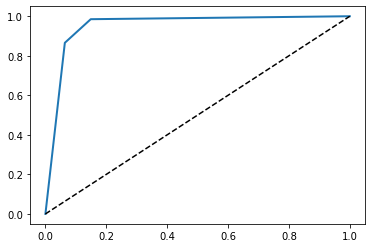

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, k_number3(2))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

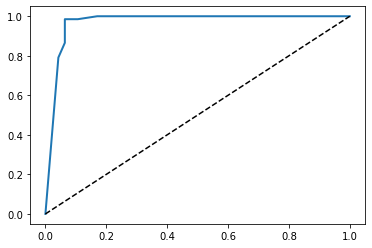

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, k_number3(10))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

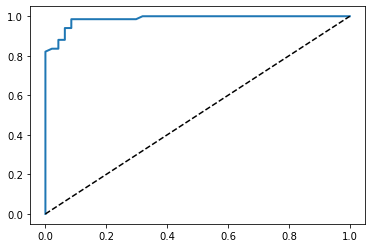

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, k_number3(50))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

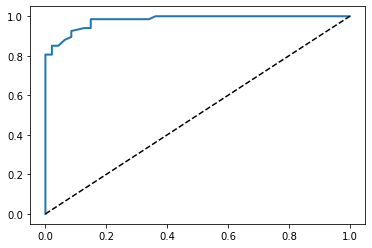

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, k_number3(100))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

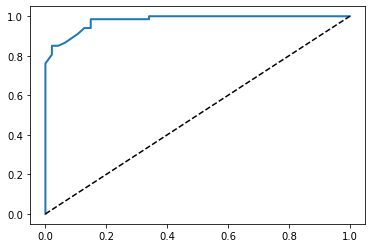

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, k_number3(200))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )  

('val_score_mean = 0.9278388278388279', 'val_score_std = 0.00578012228500346')

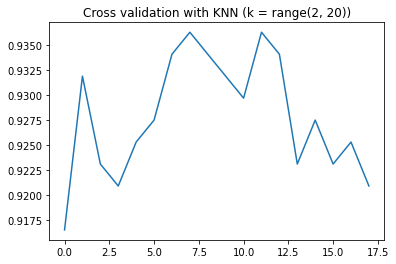

In [61]:
import numpy as np
def cross_val1(K):
    val_score = []
    for k in K:
        score_val = cross_val_score(KNeighborsClassifier(k), X_train1, y_train1, cv=5).mean()
        val_score.append(score_val)
    val_mean = (np.array(val_score)).mean()
    val_std = (np.array(val_score)).std()
    #print(val_mean)
    plt.plot(val_score)
    plt.title('Cross validation with KNN (k = {})'.format(K))
    return 'val_score_mean = {}'.format(val_mean),  'val_score_std = {}'.format(val_std)
K = range(2, 20)
cross_val1(K)

### 17.Bonus 2 : Comparer les résultats avec un autre algorithme de classification avec et sans standardScaler

In [62]:
X1 = np.array(df.iloc[:, 2:32])
y1 = np.array(df.iloc[:,1])

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline
from collections import defaultdict
from sklearn.model_selection import ShuffleSplit
from time import time
from sklearn.metrics import f1_score

pipe0 = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SVM', svm.SVC()),
])
pipe1 = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('KNN',KNeighborsClassifier(n_neighbors= 10)),
])
pipe2 = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('logisticRegression', LogisticRegression()),
])
pipe3 = Pipeline([
    ('SVM', svm.SVC()),
])
pipe4 = Pipeline([
    ('KNN',KNeighborsClassifier(n_neighbors= 10)),
])
pipe5 = Pipeline([
    ('logisticRegression', LogisticRegression()),
])



def run_pipes(pipes, splits=10, test_size=0.2, seed=0):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(X1):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = X1[idx_train]
            X_test = X1[idx_test]
            y_train = y1[idx_train]
            y_test = y1[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average = 'macro'),
                precision_score(y_test, y,average='macro'),
                recall_score(y_test, y, average='macro')
                
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "Precision" : [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            "Recall" : [arr[:,3].mean().round(3), arr[:,3].std().round(3)]
        }

    df = pd.DataFrame.from_dict(final, orient="index")
    return df

In [67]:
# run base pipes withtout tfid
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5])

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [68]:
print_table(res)

,time,f1_score,Precision,Recall
StandardScaler-SVM,0.01,"[0.972, 0.017]","[0.975, 0.015]","[0.97, 0.019]"
StandardScaler-KNN,0.00,"[0.962, 0.012]","[0.972, 0.01]","[0.954, 0.014]"
StandardScaler-logisticRegression,0.02,"[0.979, 0.014]","[0.981, 0.013]","[0.978, 0.014]"
SVM,0.01,"[0.917, 0.029]","[0.938, 0.026]","[0.906, 0.031]"
KNN,0.00,"[0.925, 0.026]","[0.933, 0.022]","[0.92, 0.03]"
logisticRegression,0.04,"[0.939, 0.017]","[0.941, 0.018]","[0.938, 0.018]"


### 16.Bonus : Implémenter votre propre algorithme KNN